In [1]:
#Import libraries  
import pandas as pd
import numpy as np
import nltk 

#Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#NLTK libaries
import re, string, unicodedata
from nltk import word_tokenize 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

#Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# True news 

In [2]:
#Read the CSV
df_true = pd.read_csv('C:\\Users\\JuanJ\\OneDrive\\Desktop\\Proyectos Programacion\\Inteligencia Artificial\\Proyectos\\Proyecto Final\\True.csv')
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [3]:
df_true.shape

(21417, 4)

In [4]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
#Agregate a new column with the information about if the new is fake or true 
#0 for the  fake news
#1 for the true news
df_true['label']= 1

In [6]:
df_true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# Fake news

In [7]:
#Read the CSV
df_false= pd.read_csv('C:\\Users\\JuanJ\\OneDrive\\Desktop\\Proyectos Programacion\\Inteligencia Artificial\\Proyectos\\Proyecto Final\\Fake.csv')
df_false.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [8]:
df_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
 #0 for the  fake news
df_false['label']=0
df_false 

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [10]:
#concatenate the two dataframes into one 
df = pd.concat([df_true,df_false],axis=0)
df.sample(10)

,title,text,subject,date,label
19449,"Turkey, Iran, Iraq consider counter-measures o...","ANKARA (Reuters) - Turkey, Iran and Iraq have ...",worldnews,"September 21, 2017",1
11712,U.S. concerned by KRG security raid on local b...,BAGHDAD (Reuters) - The U.S. Embassy in Baghda...,worldnews,"December 20, 2017",1
2269,WATCH: Morning Joe Hosts Are DONE With Trump ...,Donald Trump just ruined any remaining chance ...,News,"March 6, 2017",0
12216,MASSIVE MI VOTER FRAUD UNCOVERED? 59% Of Detro...,One-third of precincts in Wayne County could b...,politics,"Dec 6, 2016",0
13012,"BOOM! WATCH TRUMP IN FLINT: “Now, the Cars are...",OUCH! Trump really put things in perspective w...,politics,"Sep 15, 2016",0
8924,All Talk NRA Refuses Chance To Debate Obama O...,Apparently the only thing the National Rifle A...,News,"January 6, 2016",0
1254,"Trump Is Searching For A Lawyer, But Law Firm...",Damn! Donald Trump is in need of a private law...,News,"June 6, 2017",0
6041,White House says draft interrogation order is ...,WASHINGTON (Reuters) - A draft order calling f...,politicsNews,"January 25, 2017",1
16196,DEMOCRAT ALAN DERSHOWITZ Calls Out Court’s Rul...,,Government News,"Mar 20, 2017",0
17679,BITTER RADICAL ERIC HOLDER Goes After ‘ORANGE ...,The information below is disturbing and should...,left-news,"Nov 8, 2017",0


In [11]:
#Our dataframe dont have any problem, it is ready for our model
df['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

# Exploring Data



<AxesSubplot: xlabel='label', ylabel='count'>

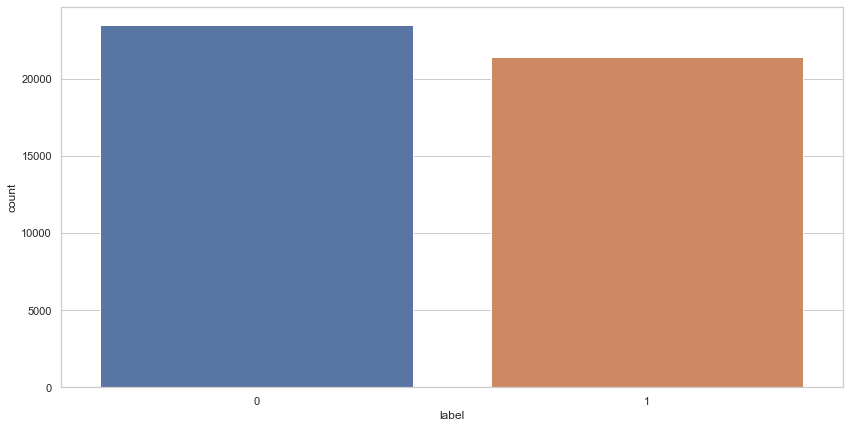

In [12]:
plt.figure(figsize=(14,7))
sns.set_theme(style="whitegrid")
sns.countplot(x=df['label'])

In [13]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot: xlabel='subject', ylabel='count'>

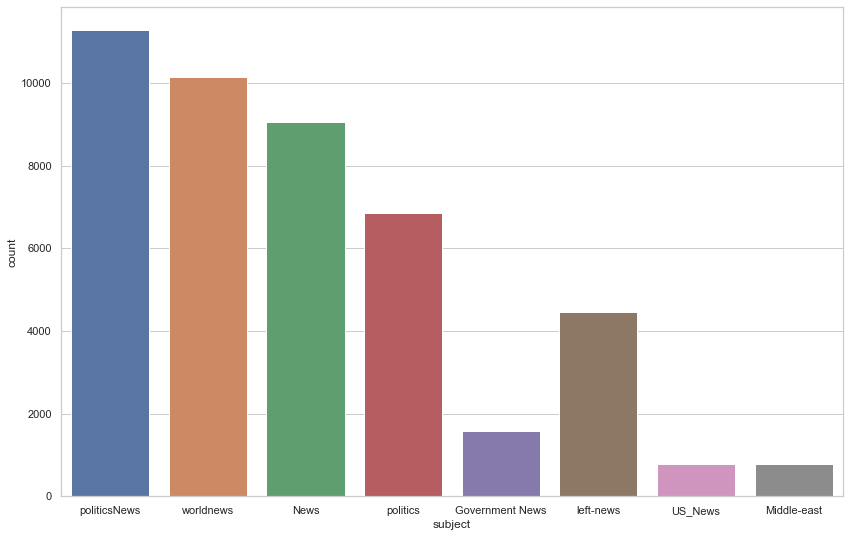

In [14]:
plt.figure(figsize=(14,9))
sns.countplot(x='subject', data=df)

# Corpus

In [15]:
#Create a column with all the relevant information4

df['text'] = df['title'] + ' ' + df['text']

#Delete the irrelevant columns 
del df['date'] # Don't have relevant information 
del df['title'] # We aggregate this in the text 

In [16]:
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)
print(stop_words)

{'he', 'now', "didn't", 'a', '!', '^', 'her', 'ma', 'yours', 'same', '|', "isn't", 'own', 'any', 'once', "shan't", "wouldn't", 'of', "shouldn't", 'me', "aren't", 'should', "you'll", 'whom', 'until', 'under', "hadn't", '-', 've', '=', 'y', 'ain', 'for', 'needn', 'hers', 'because', 'some', 'or', 'we', '.', 'doesn', 'his', 'theirs', 'aren', 'who', 'than', 'from', 'where', 'was', 'such', 'weren', '`', 'mightn', 's', 'down', '#', "haven't", 'but', 'while', 'these', 'out', 'most', 'and', 'which', 'this', '_', 'are', 'again', "wasn't", 'ourselves', 'has', 'your', 'by', "needn't", 'if', '"', 'did', 'were', '\\', 'during', 'the', "mustn't", 'i', '<', '}', 'have', 'having', 'here', 'how', 'then', 'wouldn', "mightn't", 'very', "you've", 'himself', 'wasn', 'on', 'not', '[', "she's", 'through', 'just', 'its', 'she', 'over', 'each', 'why', 'yourselves', ';', 'them', 'don', '*', 'themselves', 'few', 'm', 'been', "weren't", 'with', 'shouldn', 'myself', 'you', 'at', 'their', 'other', 'it', 'into', 'bot

In [17]:

def remove_stopwords(text):
    words = text.split()
    resultwords = [ word for word in words if word not in stop_words]
    result= ' '.join(resultwords)
    return result

def clean_comments(corpus):
    patt1 = re.compile('\d' )
    patt2 = re.compile('\W' )
    patt3 = re.compile('  *' )

    corpus= corpus.lower()
    corpus= patt1.sub('',corpus)
    corpus= patt2.sub(' ',corpus)
    corpus= patt3.sub(' ',corpus)
    corpus= remove_stopwords(corpus)
    return corpus

df['text']= df['text'].apply(lambda x: clean_comments(x))


In [18]:
df['text']

0        u budget fight looms republicans flip fiscal s...
1        u military accept transgender recruits monday ...
2        senior u republican senator let mr mueller job...
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge much amazon ...
                               ...                        
23476    mcpain john mccain furious iran treated us sai...
23477    justice yahoo settles e mail privacy class act...
23478    sunnistan us allied safe zone plan take territ...
23479    blow million al jazeera america finally calls ...
23480    u navy sailors held iranian military signs neo...
Name: text, Length: 44898, dtype: object

# WordCloud


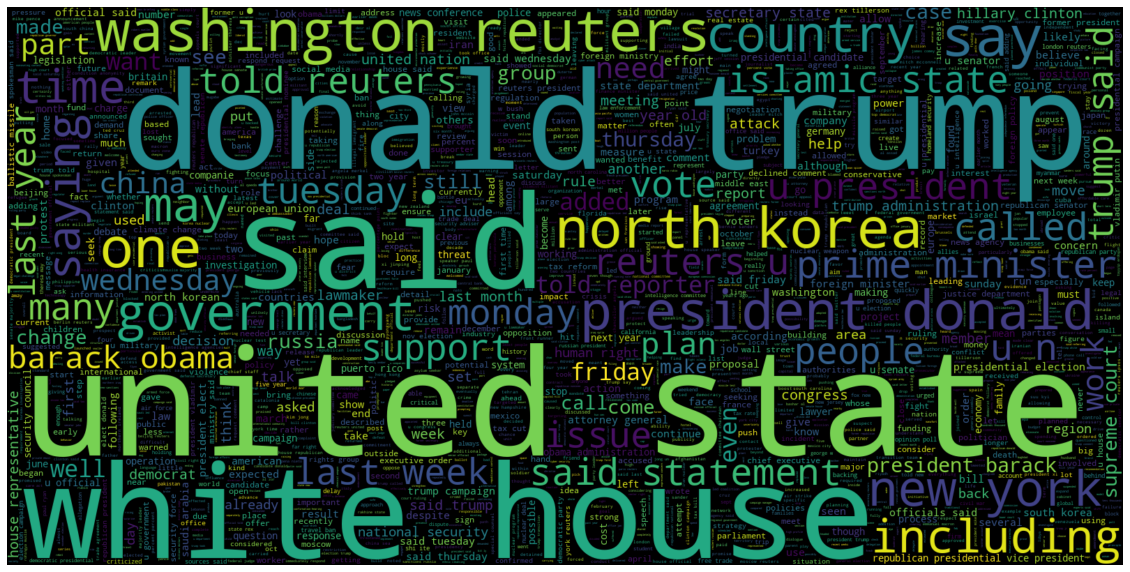

In [19]:

#True news
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label ==1].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()


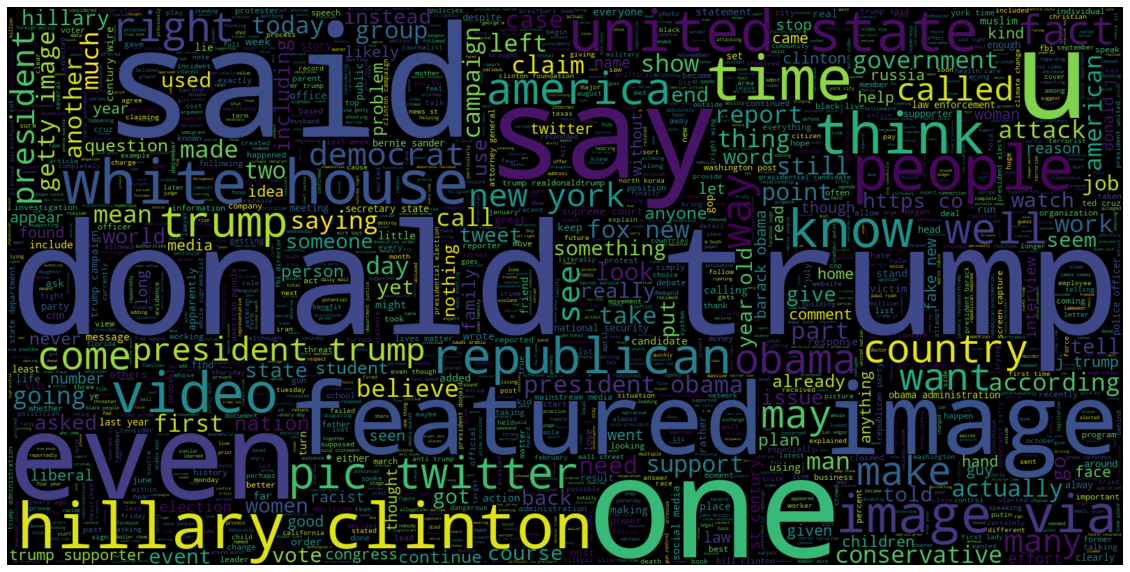

In [20]:
#Fake news

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label ==0].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [21]:
#Ponemos el texto en una variable 
corpus=df['text'].values
print(corpus[1])
print(len(corpus))

u military accept transgender recruits monday pentagon washington reuters transgender people allowed first time enlist u military starting monday ordered federal courts pentagon said friday president donald trump administration decided appeal rulings blocked transgender ban two federal appeals courts one washington one virginia last week rejected administration request put hold orders lower court judges requiring military begin accepting transgender recruits jan justice department official said administration challenge rulings department defense announced releasing independent study issues coming weeks rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior officials study implement directive trump prohibit transgender individuals serving defense department feb submit plan trump lawyers representing currently serv

# Model 

In [23]:
reduce_df= df.sample( frac=0.4)
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17959 entries, 8077 to 7505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     17959 non-null  object
 1   subject  17959 non-null  object
 2   label    17959 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 561.2+ KB


In [24]:
reduce_df['label'].value_counts()

0    9452
1    8507
Name: label, dtype: int64

In [25]:
texts= reduce_df['text']
labels = reduce_df['label']

In [26]:
# set up vector models for training and testing

# data vectorizer
vectorizer = CountVectorizer(analyzer = "word", # Indicates that individual words should be parsed as features. 
                             binary = True, #Sets the vectorizer so that the frequencies of words are ignored and only their presence is taken into account.
                             min_df = 2,    #Specifies that words must appear in at least 2 documents to be considered in the feature matrix.
                             stop_words='english')
docarray = vectorizer.fit_transform(texts).toarray()
docterm = pd.DataFrame(docarray, columns=vectorizer.get_feature_names_out())

In [27]:
# create training and test data


docterm_train, docterm_test, y_train, y_test = train_test_split(docterm, labels, test_size=0.2)

In [28]:
# Naive Bayes Model

model = MultinomialNB()
model.fit(docterm_train, y_train)

MultinomialNB()

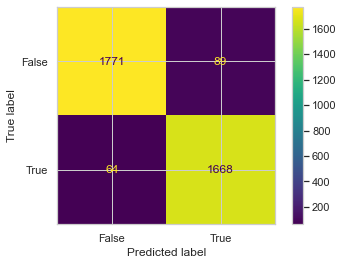

In [29]:

y_pred= model.predict(docterm_test)

matrix =metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [30]:
#Accuracy Score
print(f'Acurracy Score: {accuracy_score(y_test, y_pred)}')
#Precision Score
print(f'Precision_Score: {precision_score(y_test, y_pred)}')
#Recall_Score
print(f'Recall_Score: {recall_score(y_test, y_pred)}')
#f score
print(f'F1_Score: {f1_score(y_test, y_pred)}')
#Specificity
#TN/(TN + FN)
specificity = matrix[0,0]/(matrix[0,0]+matrix[1,0])
print('Specificity : ', specificity)

Acurracy Score: 0.9574053452115813
Precision_Score: 0.9493454752418896
Recall_Score: 0.9630484988452656
F1_Score: 0.9561478933791918
Specificity :  0.9651226158038148
